In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [65]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

df = pd.concat(
    [data.data, data.target.rename("MedHouseValue")],
    axis=1
)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [67]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [68]:
df.shape

(20640, 9)

In [69]:
X = data.data  # independent feature   
Y = data.target # dependent feature

In [70]:
# train test split 
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [72]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [73]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [74]:
# standardrizing the dataset 
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
# cross validation 

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
Regression = LinearRegression()
Regression.fit(X_train,y_train)

LinearRegression()

In [82]:
mean_square_error = cross_val_score(Regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [83]:
np.mean(mean_square_error)

-0.526825374635575

In [84]:
# prediction
Reg_Predict = Regression.predict(X_test)

In [85]:
Reg_Predict

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [86]:
import seaborn as sns

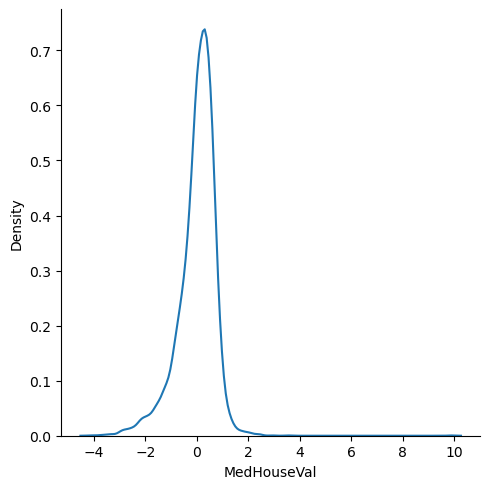

In [87]:
sns.displot(Reg_Predict-y_test, kind='kde')

In [88]:
from sklearn.metrics import r2_score

In [89]:
score = r2_score(Reg_Predict,y_test)

In [90]:
score

0.34513393809438975

In [91]:
# Ridge Regression Algorithm

In [92]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [93]:
ridge_regressor = Ridge()

In [94]:
ridge_regressor

Ridge()

In [95]:
parameters = {'alpha':[1,2,5,10,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 30, 40, 50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [96]:
print(ridgecv.best_params_)

{'alpha': 5}


In [97]:
print(ridgecv.best_score_)

-0.5268179966861516


In [98]:
ridge_pred = ridgecv.predict(X_test)

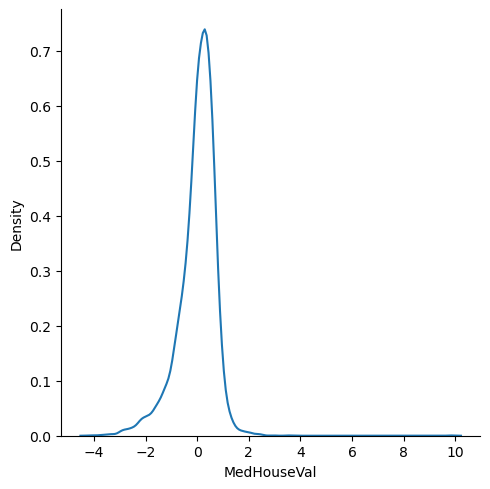

In [99]:
sns.displot(ridge_pred-y_test, kind='kde')

In [100]:
score = r2_score(ridge_pred,y_test)

In [101]:
score

0.3438394544140445

In [102]:
# Lasso Regression

In [103]:
from sklearn.linear_model import Lasso

In [104]:
lasso = Lasso()

In [105]:
parameters = {'alpha':[1,2,5,10,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 30, 40, 50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [106]:
print(lassocv.best_params_)

{'alpha': 1}


In [107]:
print(lassocv.best_score_)

-1.3400019579636542


In [108]:
lasso_pred = lassocv.predict(X_test)

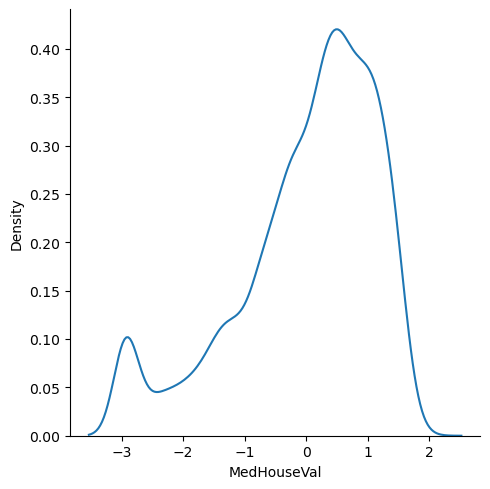

In [109]:
sns.displot(lasso_pred-y_test, kind='kde')

In [110]:
score = r2_score(lasso_pred,y_test)

In [111]:
score

0.0